<a href="https://colab.research.google.com/github/lcnature/lab_tutorials/blob/main/Solution_of_RL_fit_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## We will learn how to fit a simple model to a simple decision-making task.

## Try the task at this [link](https://run.pavlovia.org/demos/fishing_bandit/)
If you can remember your subject ID (or you can make a new name), then you can find your data [here](https://gitlab.pavlovia.org/demos/fishing_bandit/-/tree/master/data). It may be a good idea to not use your real name.

In [3]:
# Feel free to replace the file name with the data of yourself

file = 'https://gitlab.pavlovia.org/demos/fishing_bandit/-/raw/master/data/454499_fishing_bandit_2025-02-13_11h31.23.877.csv'
data = pd.read_csv(file)

In [4]:
display(data.columns)

Index(['instructions.started', 'instructions.stopped',
       'start_button.numClicks', 'start_button.timesOn',
       'start_button.timesOff', 'participant', 'session', 'date', 'expName',
       'psychopyVersion', 'OS', 'frameRate', 'trial.started', 'trial.stopped',
       'mouse.x', 'mouse.y', 'mouse.leftButton', 'mouse.midButton',
       'mouse.rightButton', 'mouse.time', 'mouse.clicked_name', 'outcome',
       'nfish', 'fish_im', 'feedback.started', 'feedback.stopped',
       'trials.thisRepN', 'trials.thisTrialN', 'trials.thisN',
       'trials.thisIndex', 'trials.ran', 'end.started', 'end.stopped',
       'exit_button.numClicks', 'exit_button.timesOn', 'exit_button.timesOff'],
      dtype='object')

In [5]:
display(data[['mouse.clicked_name','mouse.time','outcome','nfish']])

,mouse.clicked_name,mouse.time,outcome,nfish
0,NaN,NaN,NaN,NaN
1,"[""lake2"",""lake2""]",[1.4050000000000011],1.0,1.0
2,"[""lake3"",""lake3""]",[0.9800000000000004],0.0,1.0
3,"[""lake1"",""lake1""]",[0.8469999999999995],0.0,1.0
4,"[""lake2"",""lake2""]",[0.5820000000000007],0.0,1.0
5,"[""lake1"",""lake1""]",[1.0989999999999966],1.0,2.0
6,"[""lake3"",""lake3""]",[1.382000000000005],1.0,3.0
7,"[""lake2"",""lake2""]",[1.5990000000000038],1.0,4.0
8,"[""lake1"",""lake1""]",[0.8980000000000032],0.0,4.0
9,"[""lake2"",""lake2""]",[0.8470000000000013],1.0,5.0


In [6]:
# Clean up the data
data = data.dropna(subset=['mouse.clicked_name','mouse.time','outcome'])
print(data[['mouse.clicked_name','mouse.time','outcome']])

   mouse.clicked_name             mouse.time  outcome
1   ["lake2","lake2"]   [1.4050000000000011]      1.0
2   ["lake3","lake3"]   [0.9800000000000004]      0.0
3   ["lake1","lake1"]   [0.8469999999999995]      0.0
4   ["lake2","lake2"]   [0.5820000000000007]      0.0
5   ["lake1","lake1"]   [1.0989999999999966]      1.0
6   ["lake3","lake3"]    [1.382000000000005]      1.0
7   ["lake2","lake2"]   [1.5990000000000038]      1.0
8   ["lake1","lake1"]   [0.8980000000000032]      0.0
9   ["lake2","lake2"]   [0.8470000000000013]      1.0
10  ["lake3","lake3"]   [0.6480000000000032]      1.0
11  ["lake1","lake1"]   [1.2150000000000034]      1.0
12  ["lake2","lake2"]   [0.6310000000000002]      0.0
13  ["lake3","lake3"]  [0.38399999999999324]      1.0
14  ["lake3","lake3"]   [0.4650000000000034]      0.0
15  ["lake2","lake2"]  [0.46400000000000574]      0.0
16  ["lake1","lake1"]   [0.3990000000000009]      0.0
17  ["lake2","lake2"]   [0.5309999999999988]      0.0
18  ["lake3","lake3"]  [0.33

## Your task is to come up with a code to calculate the sum of log likelihood of the data for a particular set of parameters in your model. Because we want to later find the parameter combinations that yields the highest log likelihood while Python only has functions to minimize a function, we need to invert the sign of log likelihood, i.e.,
`-log p(data|parameter)`

In [7]:


def NegativeLogLikelihood(param, data):
    Q0, beta, alpha = param
    Q = np.ones(3) * Q0 # set the initial values for the 3 lakes

    n_trial = len(data)
    NLL = 0
    for i in range(n_trial):
        # put your code here to add the negative log likelihood
        # for each trial
        action = int(data.iloc[i]['mouse.clicked_name'][6]) - 1
        outcome = data.iloc[i]['outcome']
        prob_choice = np.exp(beta * Q[action]) / np.sum(np.exp(beta * Q))
        NLL = NLL - np.log(prob_choice)
        Q[action] = Q[action] + alpha * (outcome - Q[action])
    return NLL



# Now, fix all of your parameters to some values except for one, plot how the negative log likelihood depends on the value of that parameter.



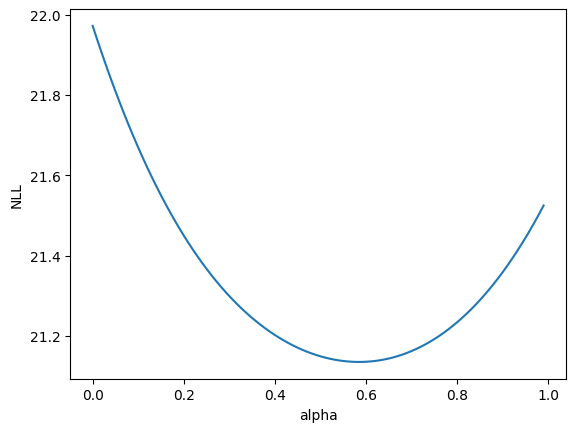

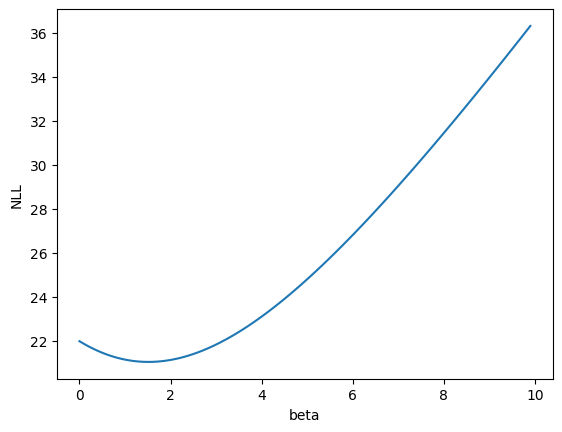

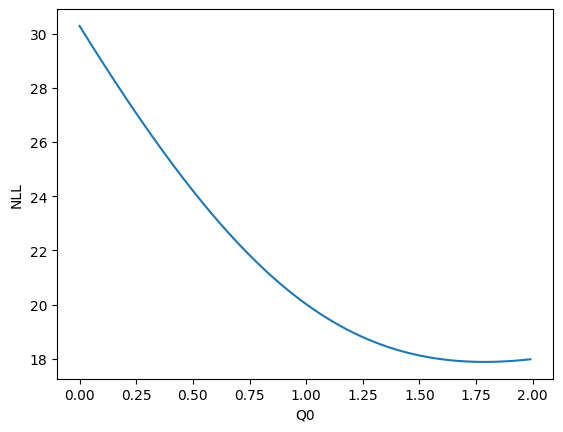

In [9]:
Q0 = 0.5
beta = 1
alpha = np.arange(0, 1, 0.01)
NLL = np.zeros(len(alpha))
for i in range(len(alpha)):
    NLL[i] = NegativeLogLikelihood([Q0, beta, alpha[i]], data)

plt.plot(alpha, NLL)
plt.xlabel('alpha')
plt.ylabel('NLL')
plt.show()


Q0 = 0.5
beta = np.arange(0, 10, 0.1)
alpha = 0.6
NLL = np.zeros(len(beta))
for i in range(len(beta)):
    NLL[i] = NegativeLogLikelihood([Q0, beta[i], alpha], data)

plt.plot(beta, NLL)
plt.xlabel('beta')
plt.ylabel('NLL')
plt.show()


Q0 = np.arange(0, 2.0, 0.01)
beta = 10.0
alpha = 0.3
NLL = np.zeros(len(Q0))
for i in range(len(Q0)):
    NLL[i] = NegativeLogLikelihood([Q0[i], beta, alpha], data)

plt.plot(Q0, NLL)
plt.xlabel('Q0')
plt.ylabel('NLL')
plt.show()

[[0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 ...
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.97 0.97 0.97 ... 0.97 0.97 0.97]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]]


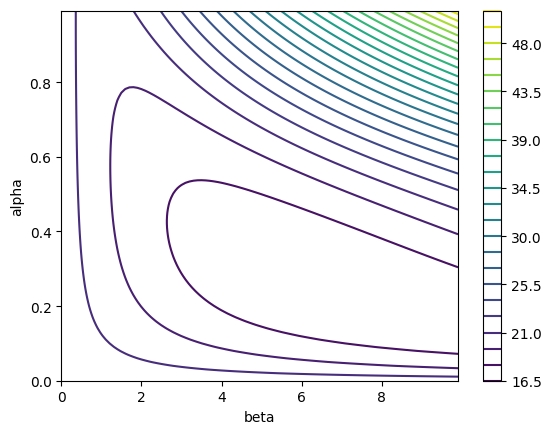

In [44]:
Q0 = 2
beta, alpha = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 1, 0.01))
print(beta)
print(alpha)
NLL = np.zeros(beta.shape)
for i in range(beta.shape[0]):
    for j in range(beta.shape[1]):
        NLL[i, j] = NegativeLogLikelihood([Q0, beta[i, j], alpha[i, j]], data)
plt.contour(beta, alpha, NLL, 30)
plt.colorbar()
plt.xlabel('beta')
plt.ylabel('alpha')
plt.show()

## Now, let's use `scipy.optimize.minimizer` to look for the best parameter.


In [45]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

In [46]:
init_param = np.asarray([0.5, 2.0, 0.2])
bnd = ((None, None), (0, 20.0), (0, 1.0))
Q0, beta, alpha = init_param

res = minimize(NegativeLogLikelihood, init_param, args=(data),
               method='L-BFGS-B', bounds=bnd)
print(res)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 16.61140410172455
        x: [ 3.502e+00  3.601e+00  4.060e-01]
      nit: 17
      jac: [-5.684e-06  7.105e-07  6.857e-05]
     nfev: 76
     njev: 19
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


## What about a model that predicts subjects randomly picking each lake with equal chance?

In [47]:
NLL_random = - np.log(1/3) * len(data)
print('negative log likelihood for random model:', NLL_random)

negative log likelihood for random model: 21.972245773362197


## What about a slightly better random model that predicts participants choose each lake with a fixed probability but the probabilities are not equal across lakes?


In [19]:
def NLL_random_diffprob(param, data):
  # param contain two numbers indicating the relative difference
  # of choice probability of the first two lakes against the last one
  logits = np.concatenate([param, np.zeros(1)])
  prob = np.exp(logits) / np.sum(np.exp(logits))
  NLL = 0
  for i in range(len(data)):
    action = int(data.iloc[i]['mouse.clicked_name'][6]) - 1
    outcome = data.iloc[i]['outcome']
    NLL -= np.log(prob[action])
  return NLL


In [20]:
init_param = np.asarray([0., 0.])


res = minimize(NLL_random_diffprob, init_param, args=(data),
               method='BFGS')
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 21.610552532083464
        x: [-4.700e-01 -1.335e-01]
      nit: 5
      jac: [ 0.000e+00 -7.153e-07]
 hess_inv: [[ 3.218e-01  1.213e-01]
            [ 1.213e-01  2.638e-01]]
     nfev: 24
     njev: 8


## How can we compare models?

## One approach is Bayesian model comparison

For each model, we calculate

$p(\text{data} | \text{model}) = \int_\theta p(\text{data} | \text{model}, \theta) p(\theta | \text{model}) d\theta $



It is not always easy to decide what the prior probability of parameters should be. In fact, one drawback of this approach is that the result can depend on the choice of the prior probability distribution.

One way is to empirically learn it across participants (this is a bit complex). Another way is to just choose a relative broad prior.

### Let's choose a flat prior for each parameter

$p(Q_0 | model) = U(-5, 5)$

$p(\beta | model) = U(0, 10)$

$p(\alpha | model) = U(0, 1)$

We divide each parameter's range into 20 bins

In [22]:
bnd_Q0 = [-5, 5]
bin_width_Q0 = (bnd_Q0[1] - bnd_Q0[0]) / 20
bins_Q0 = np.linspace(bnd_Q0[0] + bin_width_Q0 / 2,
                      bnd_Q0[1] - + bin_width_Q0 / 2, 20)
print(bins_Q0)

bnd_beta = [0, 10]
bin_width_beta = (bnd_beta[1] - bnd_beta[0]) / 20
bins_beta = np.linspace(bnd_beta[0] + bin_width_beta / 2,
                        bnd_beta[1] - + bin_width_beta / 2, 20)
print(bins_beta)

bnd_alpha = [0, 1]
bin_width_alpha = (bnd_alpha[1] - bnd_alpha[0]) / 20
bins_alpha = np.linspace(bnd_alpha[0] + bin_width_alpha / 2,
                         bnd_alpha[1] - + bin_width_alpha / 2, 20)
print(bins_alpha)

[-4.75 -4.25 -3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75
  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75]
[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75 6.25 6.75
 7.25 7.75 8.25 8.75 9.25 9.75]
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]


In [23]:
Q0, beta, alpha = np.meshgrid(bins_Q0, bins_beta, bins_alpha)
LL_all = np.zeros(Q0.shape)
for i in range(Q0.shape[0]):
    for j in range(Q0.shape[1]):
        for k in range(Q0.shape[2]):
            param = [Q0[i, j, k], beta[i, j, k], alpha[i, j, k]]
            LL_all[i, j, k] = - NegativeLogLikelihood(param, data)
model_LL = np.log(np.sum(np.exp(LL_all) * (1/20) ** 3))
print('model log likelihood:', model_LL)

model log likelihood: -19.537995803190665


## What about the random model?
If we assume all choices are picked randomly with probability of 1/3, then there is no free parameters.



In [24]:
LL_random = np.log(1/3) * 20
print('log likelihood for random model:', LL_random)

log likelihood for random model: -21.972245773362197


## What about the random models with unknown probability for choosing among three lakes?

The only restriction is that the three probabilities should sum to 1

We can specify two probabilities $p_1$ and $p_2$ as free parameters, $p_3 = 1 - p_1 - p_2$.


In [41]:
N = 100  # Number of bins
bins = []

# Generate all integer partitions of N into three parts
for i1 in range(N + 1):
    for i2 in range(N + 1 - i1):
        i3 = N - i1 - i2
        bins.append((i1 / N, i2 / N, i3 / N))

bins = np.array(bins)
print(bins)
print(np.shape(bins))

[[0.   0.   1.  ]
 [0.   0.01 0.99]
 [0.   0.02 0.98]
 ...
 [0.99 0.   0.01]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]]
(5151, 3)


In [28]:
def LL_random_diffprob_V2(prob, data):
  # param contain two numbers indicating the relative difference
  # of choice probability of the first two lakes against the last one

  LL = 0
  for i in range(len(data)):
    action = int(data.iloc[i]['mouse.clicked_name'][6]) - 1
    outcome = data.iloc[i]['outcome']
    LL += np.log(prob[action])
  return LL

In [31]:
LL_random_diffprob_V2([0,0,1], data)

<ipython-input-28-cd08c1307c13>:9: RuntimeWarning: divide by zero encountered in log
  LL += np.log(prob[action])


-inf

In [42]:
all_LL_random_diff_prob = np.zeros(np.shape(bins))
for idx, prob in enumerate(bins):
    all_LL_random_diff_prob[idx] = LL_random_diffprob_V2(prob, data)


<ipython-input-28-cd08c1307c13>:9: RuntimeWarning: divide by zero encountered in log
  LL += np.log(prob[action])


In [43]:
max_LL = np.max(all_LL_random_diff_prob)
print(max_LL)

model_LL_random_diff_prob = max_LL + np.log(np.sum(np.exp(all_LL_random_diff_prob-max_LL))) + max_LL - np.log(np.shape(bins)[0])
print('model log likelihood:', model_LL_random_diff_prob)

-21.61055253208344
model log likelihood: -44.40247136800037


 The average model likelihood is much lower than the best log likelihood (-21.61), because many parameter combinations are far away from the behavior